In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload() #upload the file "churn.arff" from your computer here every time you re-run

Saving churn.arff to churn (6).arff


In [3]:
# for data manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for handing imbalanced data
from imblearn.over_sampling import SMOTE

# for data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

# for model evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
from scipy.io import arff
data_file="churn.arff"
data=arff.loadarff(data_file)

In [5]:
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')

In [6]:
df.head(5)

,State,Account Length,Area Code,Phone Number,Inter Plan,VoiceMail Plan,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,...,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service,Churn
0,OH,107.0,A415,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,FALSE
1,NJ,137.0,A415,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,FALSE
2,OH,84.0,A408,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,FALSE
3,OK,75.0,A415,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,FALSE
4,AL,118.0,A510,391-8027,yes,no,0.0,223.4,98.0,37.98,...,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,FALSE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         3333 non-null   object 
 1   Account Length                3333 non-null   float64
 2   Area Code                     3333 non-null   object 
 3   Phone Number                  3333 non-null   object 
 4   Inter Plan                    3333 non-null   object 
 5   VoiceMail Plan                3333 non-null   object 
 6   No of Vmail Mesgs             3333 non-null   float64
 7   Total Day Min                 3333 non-null   float64
 8   Total Day calls               3333 non-null   float64
 9   Total Day Charge              3333 non-null   float64
 10  Total Evening Min             3333 non-null   float64
 11  Total Evening Calls           3333 non-null   float64
 12  Total Evening Charge          3333 non-null   float64
 13  Tot

In [8]:
df.describe()

,Account Length,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
No of Vmail Mesgs,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total Day Min,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total Day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total Evening Min,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total Evening Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total Evening Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total Night Minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
Total Night Calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [10]:
df.shape

(3333, 21)

In [11]:
df.isna().sum()

State                           0
Account Length                  0
Area Code                       0
Phone Number                    0
Inter Plan                      0
VoiceMail Plan                  0
No of Vmail Mesgs               0
Total Day Min                   0
Total Day calls                 0
Total Day Charge                0
Total Evening Min               0
Total Evening Calls             0
Total Evening Charge            0
Total Night Minutes             0
Total Night Calls               0
Total Night Charge              0
Total Int Min                   0
Total Int Calls                 0
Total Int Charge                0
No of Calls Customer Service    0
Churn                           0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    3333
dtype: int64

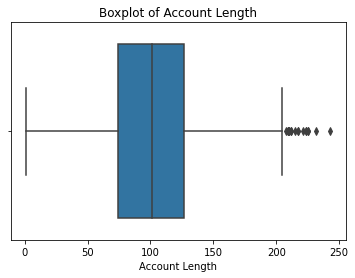

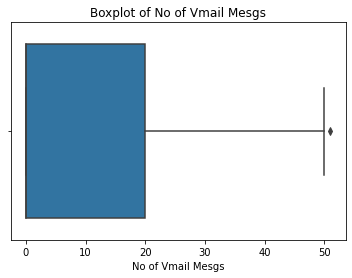

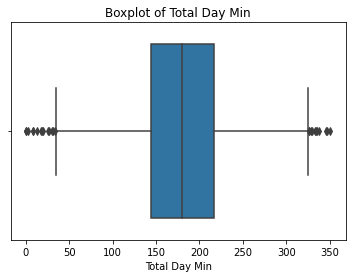

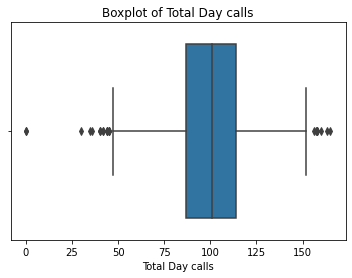

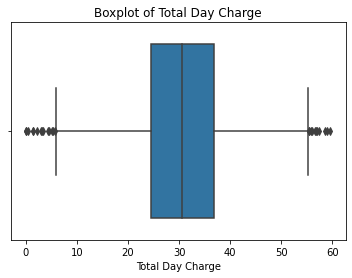

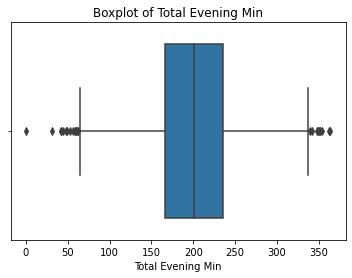

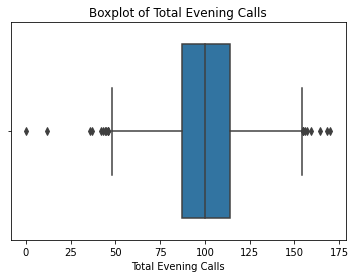

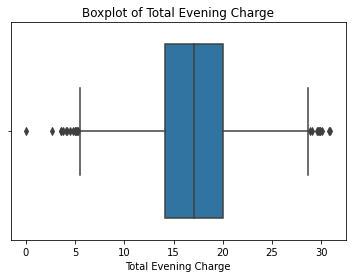

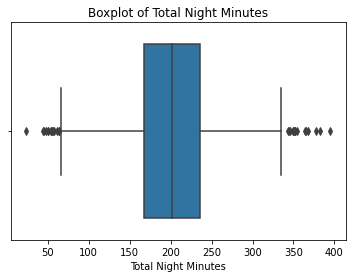

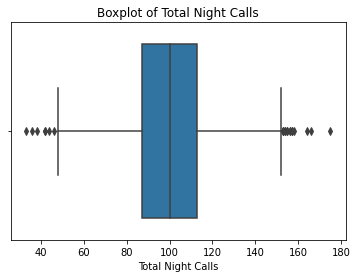

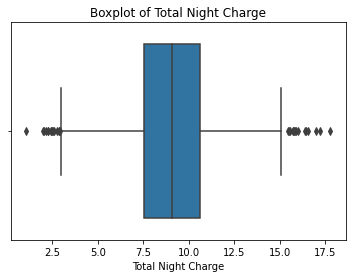

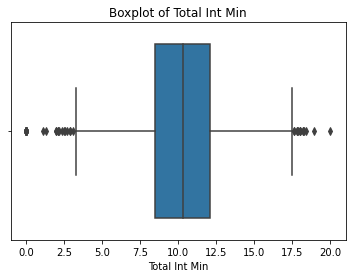

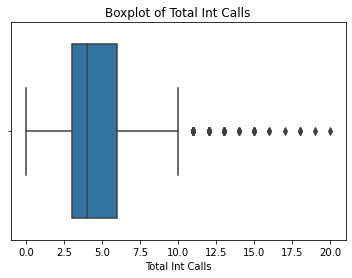

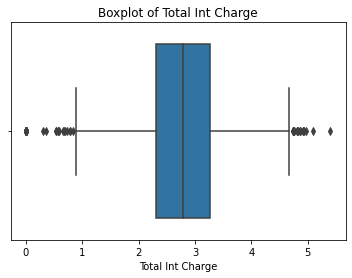

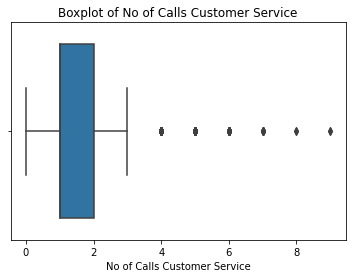

In [13]:
# Boxplot to investigate outliers for numerical values
def boxplot(column):
    sns.boxplot(data=df,x=df[f"{column}"])
    plt.title(f"Boxplot of {column}")
    plt.show()

boxplot('Account Length')
boxplot('No of Vmail Mesgs')
boxplot('Total Day Min')
boxplot('Total Day calls')
boxplot('Total Day Charge')
boxplot('Total Evening Min')
boxplot('Total Evening Calls')
boxplot('Total Evening Charge')
boxplot('Total Night Minutes')
boxplot('Total Night Calls')
boxplot('Total Night Charge')
boxplot('Total Int Min')
boxplot('Total Int Calls')
boxplot('Total Int Charge')
boxplot('No of Calls Customer Service')

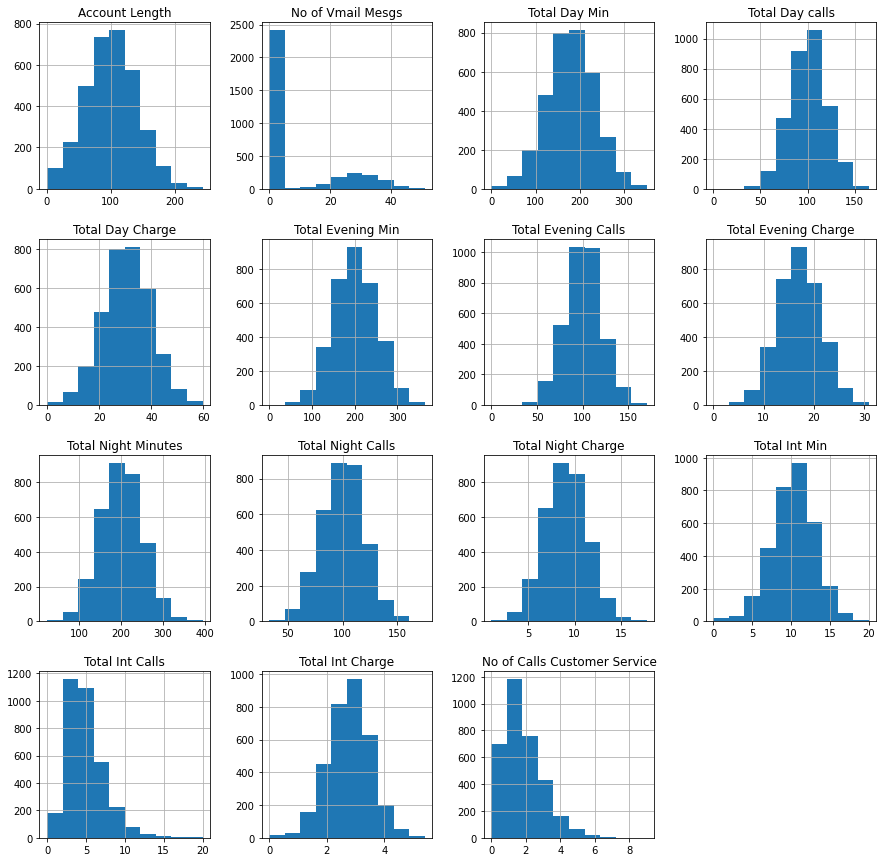

In [14]:
# Plot histogram for numerical data 
df.hist(figsize=(15,15))
plt.show()

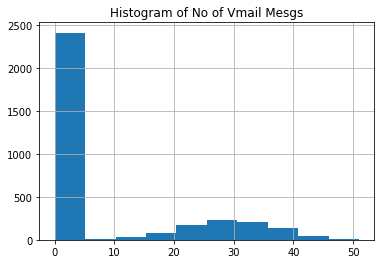

In [15]:
# Plot the histogram of "No of Vmail Mesgs" again - without class separation
df["No of Vmail Mesgs"].hist()
plt.title("Histogram of No of Vmail Mesgs")
plt.show()

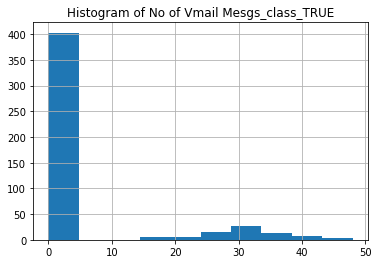

In [16]:
# Investigate "No of Vmail Mesgs" with impact on class attribute_TRUE:
df.query('Churn == "TRUE" ')["No of Vmail Mesgs"].hist()
plt.title("Histogram of No of Vmail Mesgs_class_TRUE")
plt.show()

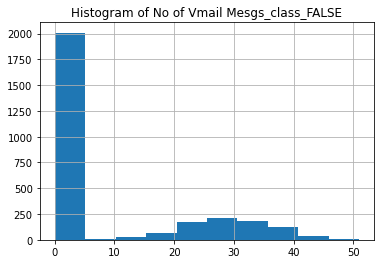

In [17]:
# Investigate "No of Vmail Mesgs" with impact on class attribute_FALSE:
df.query('Churn == "FALSE" ')["No of Vmail Mesgs"].hist()
plt.title("Histogram of No of Vmail Mesgs_class_FALSE")
plt.show()

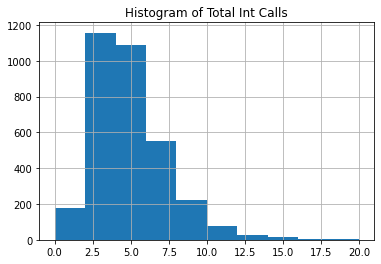

In [18]:
# Plot the histogram of "Total Int Calls" again - without class separation
df["Total Int Calls"].hist()
plt.title("Histogram of Total Int Calls")
plt.show()

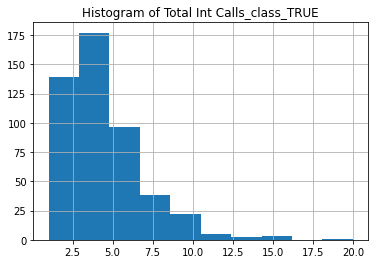

In [19]:
# Investigate "Total Int Calls" with impact on class attribute_TRUE:
df.query('Churn == "TRUE" ')["Total Int Calls"].hist()
plt.title("Histogram of Total Int Calls_class_TRUE")
plt.show()

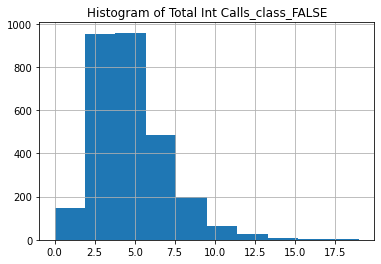

In [20]:
# Investigate "Total Int Calls" with impact on class attribute_FALSE:
df.query('Churn == "FALSE" ')["Total Int Calls"].hist()
plt.title("Histogram of Total Int Calls_class_FALSE")
plt.show()

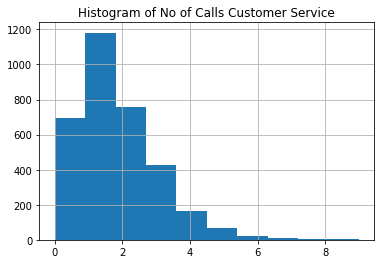

In [21]:
# Plot the histogram of "No of Calls Customer Service" again - without class separation
df["No of Calls Customer Service"].hist()
plt.title("Histogram of No of Calls Customer Service")
plt.show()

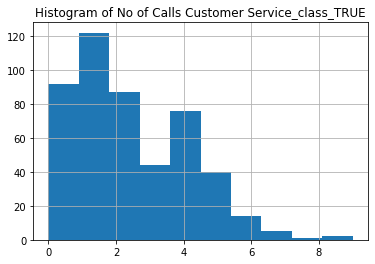

In [22]:
# Investigate "No of Calls Customer Service" with impact on class attribute_TRUE:
df.query('Churn == "TRUE" ')["No of Calls Customer Service"].hist()
plt.title("Histogram of No of Calls Customer Service_class_TRUE")
plt.show()

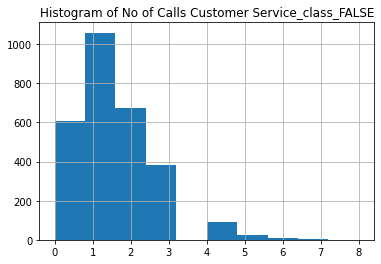

In [23]:
# Investigate "No of Calls Customer Service" with impact on class attribute_FALSE:
df.query('Churn == "FALSE" ')["No of Calls Customer Service"].hist()
plt.title("Histogram of No of Calls Customer Service_class_FALSE")
plt.show()

In [24]:
# Imbalance class test - churned or not churned
churned = df[df['Churn']=='TRUE']
not_churned = df[df['Churn']=='FALSE']

print('Percentage of churned customer: {}'.format(churned.shape[0]/df.shape[0]))
print('Percentage of not-churned customer: {}'.format(not_churned.shape[0]/df.shape[0]))

Percentage of churned customer: 0.14491449144914492
Percentage of not-churned customer: 0.8550855085508551


FALSE    2850
TRUE      483
Name: Churn, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


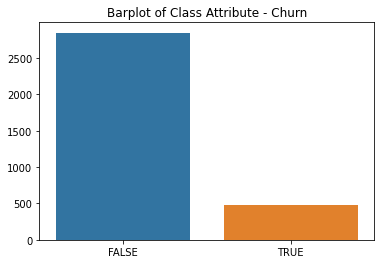

In [25]:
churn_col = df['Churn'].value_counts()
print(churn_col)
sns.barplot(churn_col.index, churn_col.values)
plt.title("Barplot of Class Attribute - Churn")
plt.show()

In [26]:
# Calculate churn rate
churn_rate = (churn_col[1] / df.shape[0])
print('Churn Rate:', churn_rate)

Churn Rate: 0.14491449144914492


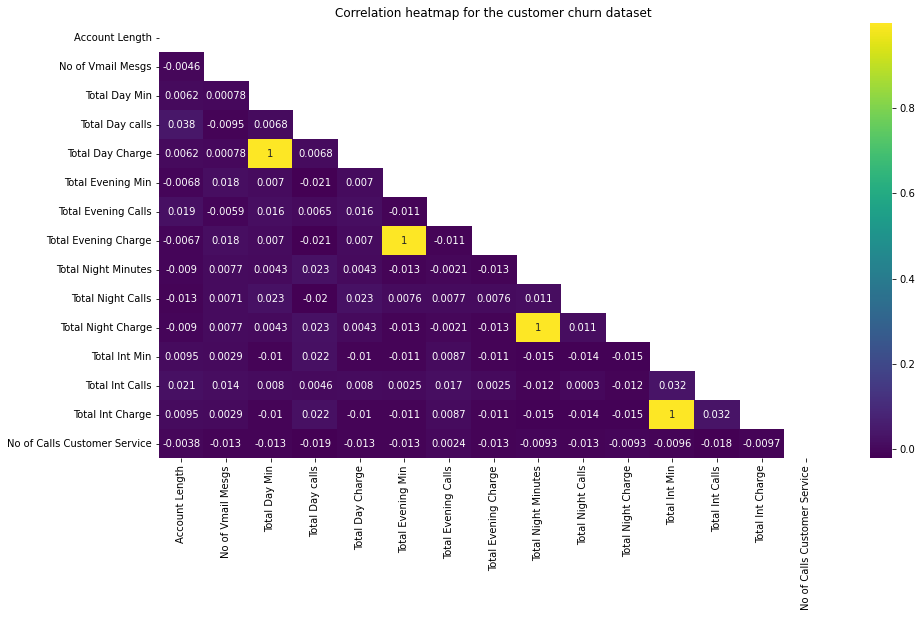

In [27]:
# Correlation heatmap
plt.figure(figsize=(15,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.title("Correlation heatmap for the customer churn dataset")
plt.show()

In [28]:
# Check the 'Phone Number' column's values before droppping:
df['Phone Number'].value_counts()

371-7191    1
404-2942    1
415-3689    1
379-2503    1
396-1106    1
           ..
368-1288    1
403-5279    1
397-9333    1
411-7353    1
382-4657    1
Name: Phone Number, Length: 3333, dtype: int64

In [29]:
#since Phone number doesn't give us any info to that can help us in our analysis.
df = df.drop(['Phone Number'], axis = 1)

In [30]:
pip install markupsafe==2.0.1

In [31]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [32]:
profile.to_notebook_iframe()

In [33]:
# One-hot encoding from categorical to numerical data
# Let's create a list for our categorical columns for our customer churn dataset
cat_cols=["State","Area Code", "Inter Plan", "VoiceMail Plan"]

In [34]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
df_onehot

,State,Account Length,Area Code,Inter Plan,VoiceMail Plan,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service,Churn
0,OH,107.0,A415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,FALSE
1,NJ,137.0,A415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,FALSE
2,OH,84.0,A408,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,FALSE
3,OK,75.0,A415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,FALSE
4,AL,118.0,A510,yes,no,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WV,68.0,A415,no,no,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,FALSE
3329,RI,28.0,A510,no,no,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,FALSE
3330,CT,184.0,A510,yes,no,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,FALSE
3331,TN,74.0,A415,no,yes,25.0,234.4,113.0,39.85,265.9,82.0,22.60,241.4,77.0,10.86,13.7,4.0,3.70,0.0,FALSE


In [35]:
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)

#print the dataset
df_onehot

,Account Length,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,State_WI,State_WV,State_WY,Area Code_A408,Area Code_A415,Area Code_A510,Inter Plan_no,Inter Plan_yes,VoiceMail Plan_no,VoiceMail Plan_yes
0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,...,0,0,0,0,1,0,1,0,0,1
1,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,...,0,0,0,0,1,0,1,0,1,0
2,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,...,0,0,0,1,0,0,0,1,1,0
3,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,...,0,0,0,0,1,0,0,1,1,0
4,118.0,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,68.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,...,0,1,0,0,1,0,1,0,1,0
3329,28.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,...,0,0,0,0,0,1,1,0,1,0
3330,184.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,...,0,0,0,0,0,1,0,1,1,0
3331,74.0,25.0,234.4,113.0,39.85,265.9,82.0,22.60,241.4,77.0,...,0,0,0,0,1,0,1,0,0,1


In [36]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account Length                3333 non-null   float64
 1   No of Vmail Mesgs             3333 non-null   float64
 2   Total Day Min                 3333 non-null   float64
 3   Total Day calls               3333 non-null   float64
 4   Total Day Charge              3333 non-null   float64
 5   Total Evening Min             3333 non-null   float64
 6   Total Evening Calls           3333 non-null   float64
 7   Total Evening Charge          3333 non-null   float64
 8   Total Night Minutes           3333 non-null   float64
 9   Total Night Calls             3333 non-null   float64
 10  Total Night Charge            3333 non-null   float64
 11  Total Int Min                 3333 non-null   float64
 12  Total Int Calls               3333 non-null   float64
 13  Tot

In [37]:
from collections import Counter

# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is "Churn" here and everything else will be used as features 
class_col_name='Churn'

feature_names=df_onehot.columns[df_onehot.columns != class_col_name]

# Making a SMOTE object
resampler = SMOTE(random_state=5)

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109)

# Resampling the data
X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

# Verifying the resampled data
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'FALSE': 2000, 'TRUE': 2000})


class Names ['FALSE' 'TRUE']


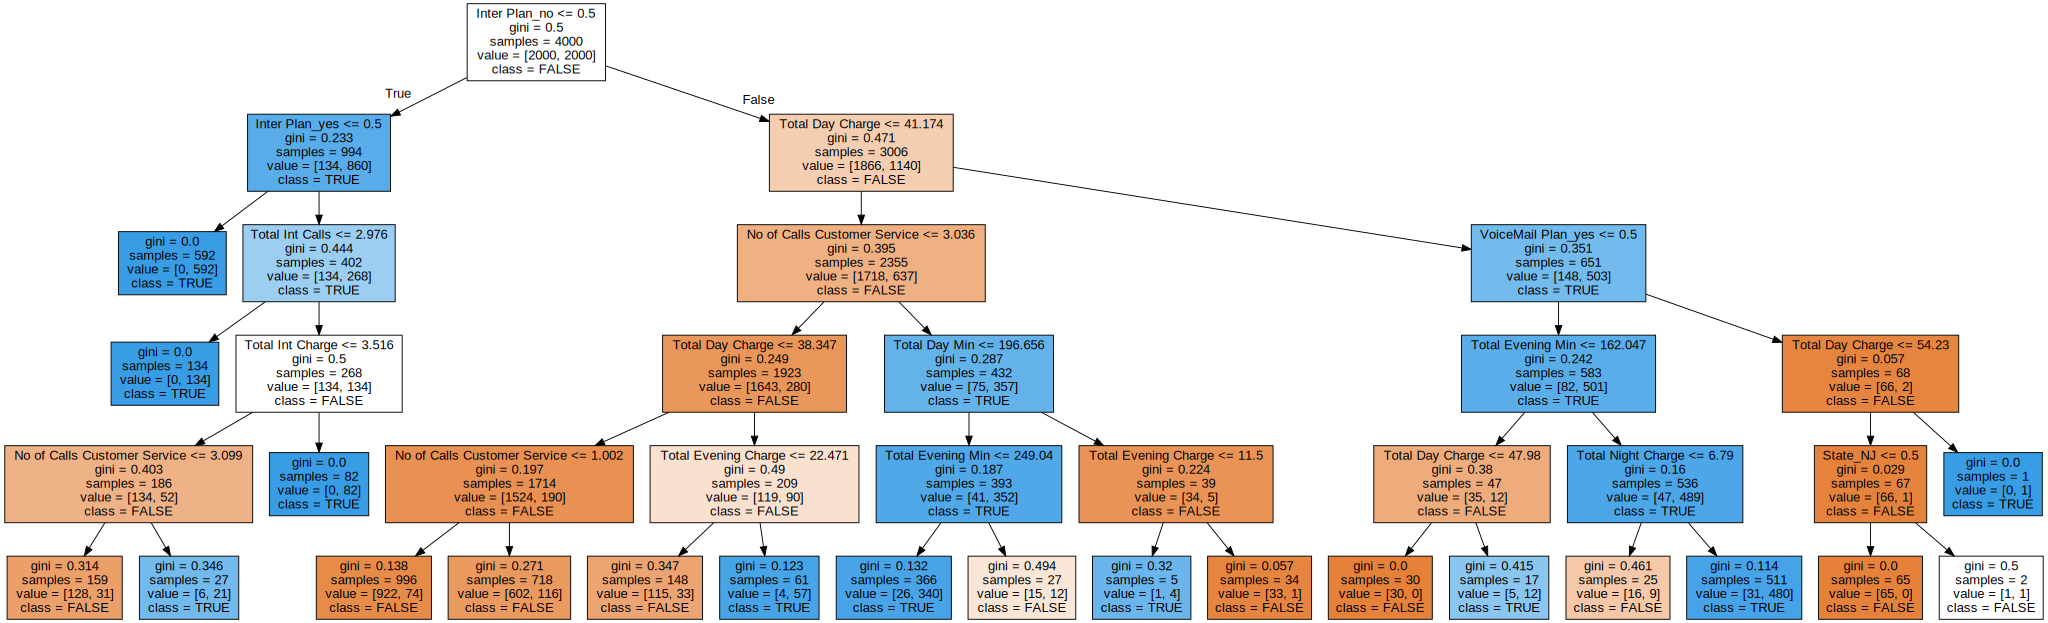

In [38]:
# Run a decision tree in one-hot coded, resampled data
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_resampled, y_resampled)

import graphviz

#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data_baseline = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
fie_ext = 'png'
temp_img = 'decision_tree_baseline'
decision_tree_baseline = graphviz.Source(dot_data_baseline, format="png")
decision_tree_baseline.render(temp_img,format=fie_ext, view=False)
decision_tree_baseline

In [39]:
# Perform the predictions on the test set
y_pred = clf.predict(X_test)

In [40]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       FALSE       0.96      0.96      0.96       850
        TRUE       0.76      0.75      0.76       150

    accuracy                           0.93      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.93      0.93      0.93      1000



In [41]:
from sklearn.metrics import accuracy_score

print('The Baseline Classification Tree Model accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The Baseline Classification Tree Model accuracy score is: 0.9270


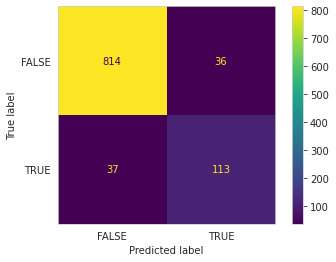

In [42]:
# Plot the confusion matrix
# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [43]:
cf = confusion_matrix(y_test, y_pred)
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

[[814  36]
 [ 37 113]]
TP:  113 , FP:  36 , TN:  814 , FN: 37


In [44]:
# View again X_resampled
X_resampled

,Account Length,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,State_WI,State_WV,State_WY,Area Code_A408,Area Code_A415,Area Code_A510,Inter Plan_no,Inter Plan_yes,VoiceMail Plan_no,VoiceMail Plan_yes
0,166.000000,0.0,197.900000,89.000000,33.640000,251.000000,113.000000,21.340000,138.300000,85.000000,...,0,0,0,0,0,1,1,0,1,0
1,80.000000,0.0,209.900000,74.000000,35.680000,195.100000,77.000000,16.580000,208.200000,119.000000,...,0,0,0,1,0,0,1,0,1,0
2,91.000000,23.0,232.400000,97.000000,39.510000,186.000000,88.000000,15.810000,190.500000,128.000000,...,0,0,0,0,0,1,1,0,0,1
3,59.000000,0.0,179.400000,80.000000,30.500000,232.500000,99.000000,19.760000,175.800000,105.000000,...,0,0,0,0,0,1,1,0,1,0
4,88.000000,0.0,55.600000,65.000000,9.450000,242.700000,121.000000,20.630000,176.300000,134.000000,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,52.641785,0.0,288.045141,74.629858,48.965565,222.825133,110.336130,18.938489,204.498630,106.945671,...,0,0,0,0,0,0,1,0,1,0
3996,140.693100,0.0,189.859541,105.109607,32.275567,179.147904,101.956157,15.228517,188.948742,128.708254,...,0,0,0,0,0,0,0,0,1,0
3997,90.365236,0.0,193.119035,65.312983,32.830419,264.779099,79.539056,22.507041,231.714436,117.547854,...,0,0,0,0,1,0,1,0,1,0
3998,107.435165,0.0,277.021439,119.221379,47.091309,273.552566,100.122077,23.250525,250.451807,91.992408,...,0,0,0,0,0,0,0,0,1,0


In [45]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account Length                4000 non-null   float64
 1   No of Vmail Mesgs             4000 non-null   float64
 2   Total Day Min                 4000 non-null   float64
 3   Total Day calls               4000 non-null   float64
 4   Total Day Charge              4000 non-null   float64
 5   Total Evening Min             4000 non-null   float64
 6   Total Evening Calls           4000 non-null   float64
 7   Total Evening Charge          4000 non-null   float64
 8   Total Night Minutes           4000 non-null   float64
 9   Total Night Calls             4000 non-null   float64
 10  Total Night Charge            4000 non-null   float64
 11  Total Int Min                 4000 non-null   float64
 12  Total Int Calls               4000 non-null   float64
 13  Tot

In [46]:
# View again y_resampled, will not be affected by using only selected columns in the X_resampled training test
y_resampled

0       FALSE
1       FALSE
2       FALSE
3       FALSE
4       FALSE
        ...  
3995     TRUE
3996     TRUE
3997     TRUE
3998     TRUE
3999     TRUE
Name: Churn, Length: 4000, dtype: object

In [47]:
# Highly correlated features (8 columns) to be excluded
highly_cor_feature_names=["Total Day Min", "Total Day Charge", "Total Evening Min", "Total Evening Charge", "Total Night Minutes", "Total Night Charge", "Total Int Min", "Total Int Charge"]

# Retrain the X_resampled training set to include only the selected features, exclude the highly correlated features
X_resampled_new = X_resampled[X_resampled.columns.difference(highly_cor_feature_names)]

# Print the X_resampled dataset again
X_resampled_new

,Account Length,Area Code_A408,Area Code_A415,Area Code_A510,Inter Plan_no,Inter Plan_yes,No of Calls Customer Service,No of Vmail Mesgs,State_AK,State_AL,...,State_WA,State_WI,State_WV,State_WY,Total Day calls,Total Evening Calls,Total Int Calls,Total Night Calls,VoiceMail Plan_no,VoiceMail Plan_yes
0,166.000000,0,0,1,1,0,2.000000,0.0,0,0,...,0,0,0,0,89.000000,113.000000,2.000000,85.000000,1,0
1,80.000000,1,0,0,1,0,2.000000,0.0,0,0,...,0,0,0,0,74.000000,77.000000,4.000000,119.000000,1,0
2,91.000000,0,0,1,1,0,3.000000,23.0,0,1,...,0,0,0,0,97.000000,88.000000,3.000000,128.000000,0,1
3,59.000000,0,0,1,1,0,0.000000,0.0,0,0,...,0,0,0,0,80.000000,99.000000,3.000000,105.000000,1,0
4,88.000000,0,1,0,1,0,0.000000,0.0,0,0,...,0,0,0,0,65.000000,121.000000,4.000000,134.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,52.641785,0,0,0,1,0,1.054329,0.0,0,0,...,0,0,0,0,74.629858,110.336130,4.945671,106.945671,1,0
3996,140.693100,0,0,0,0,0,0.510961,0.0,0,0,...,0,0,0,0,105.109607,101.956157,2.978079,128.708254,1,0
3997,90.365236,0,1,0,1,0,2.204346,0.0,0,0,...,0,0,0,0,65.312983,79.539056,5.386963,117.547854,1,0
3998,107.435165,0,0,0,0,0,0.778621,0.0,0,0,...,0,0,0,0,119.221379,100.122077,6.335864,91.992408,1,0


In [48]:
X_resampled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account Length                4000 non-null   float64
 1   Area Code_A408                4000 non-null   uint8  
 2   Area Code_A415                4000 non-null   uint8  
 3   Area Code_A510                4000 non-null   uint8  
 4   Inter Plan_no                 4000 non-null   uint8  
 5   Inter Plan_yes                4000 non-null   uint8  
 6   No of Calls Customer Service  4000 non-null   float64
 7   No of Vmail Mesgs             4000 non-null   float64
 8   State_AK                      4000 non-null   uint8  
 9   State_AL                      4000 non-null   uint8  
 10  State_AR                      4000 non-null   uint8  
 11  State_AZ                      4000 non-null   uint8  
 12  State_CA                      4000 non-null   uint8  
 13  Sta

In [49]:
selected_feature_names = df_onehot[df_onehot.columns.difference(['Churn']+highly_cor_feature_names)].columns
selected_feature_names

Index(['Account Length', 'Area Code_A408', 'Area Code_A415', 'Area Code_A510',
       'Inter Plan_no', 'Inter Plan_yes', 'No of Calls Customer Service',
       'No of Vmail Mesgs', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Total Day calls', 'Total Evening Calls', 'Total Int Calls',
       'Total Night Calls', 'VoiceMail Plan_no', 'VoiceMail Plan_yes'],
      dtype

class Names ['FALSE' 'TRUE']


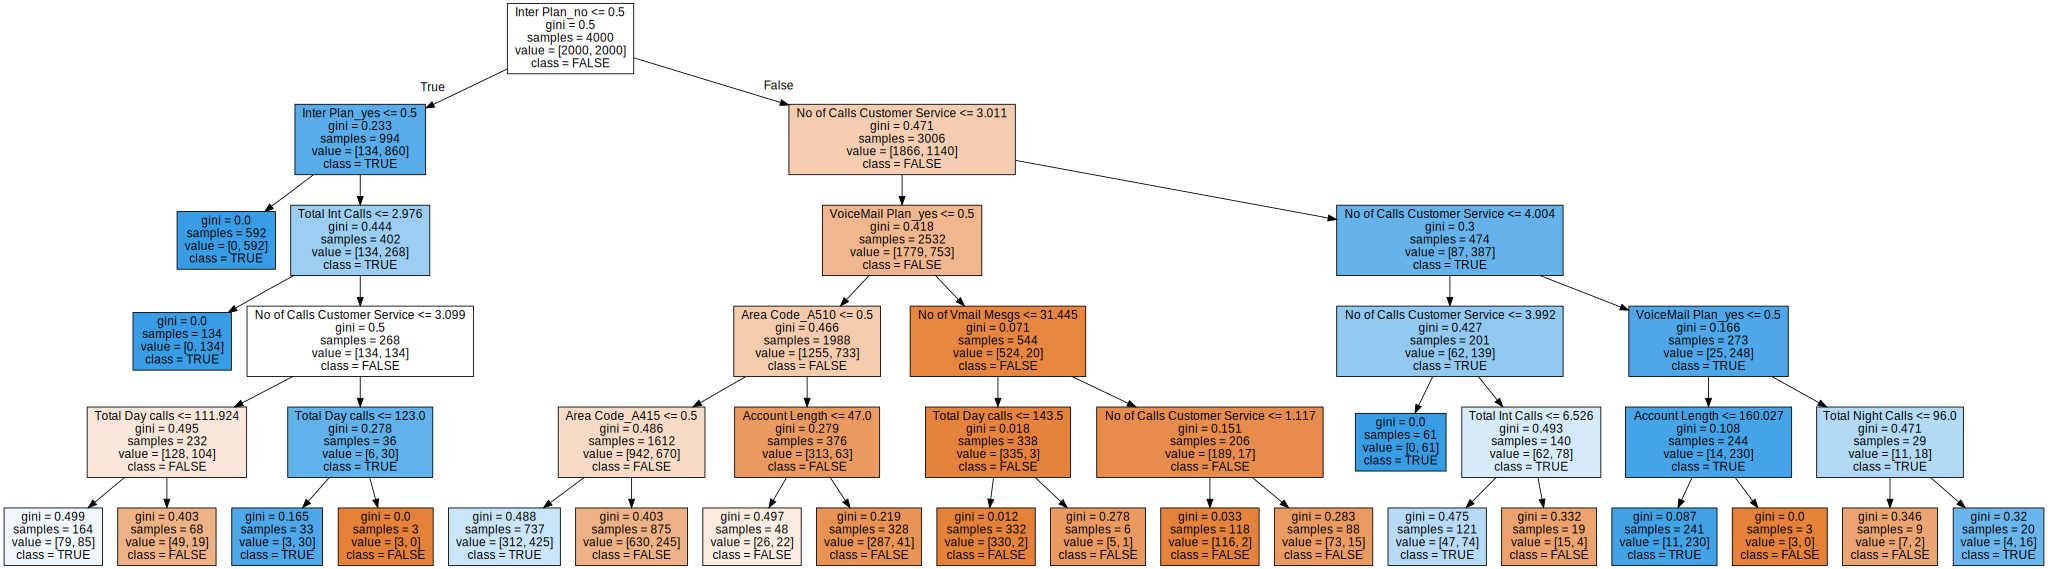

In [50]:
# Fitting and predicting the model again with only selected features
# Run a decision tree again
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_resampled_new, y_resampled)

import graphviz

#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data_selected = tree.export_graphviz(clf, out_file=None, 
                                feature_names=selected_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
fie_ext = 'png'
temp_img = 'decision_tree_selected'
decision_tree_selected = graphviz.Source(dot_data_selected, format="png")
decision_tree_selected.render(temp_img,format=fie_ext, view=False)
decision_tree_selected

In [51]:
# Transform the X-test dataset
X_test_new = X_test[X_test.columns.difference(highly_cor_feature_names)]

X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 471 to 1526
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account Length                1000 non-null   float64
 1   Area Code_A408                1000 non-null   uint8  
 2   Area Code_A415                1000 non-null   uint8  
 3   Area Code_A510                1000 non-null   uint8  
 4   Inter Plan_no                 1000 non-null   uint8  
 5   Inter Plan_yes                1000 non-null   uint8  
 6   No of Calls Customer Service  1000 non-null   float64
 7   No of Vmail Mesgs             1000 non-null   float64
 8   State_AK                      1000 non-null   uint8  
 9   State_AL                      1000 non-null   uint8  
 10  State_AR                      1000 non-null   uint8  
 11  State_AZ                      1000 non-null   uint8  
 12  State_CA                      1000 non-null   uint8  
 13  S

In [52]:
# Perform again the predictions on the test set
y_pred = clf.predict(X_test_new)

In [53]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       FALSE       0.91      0.75      0.82       850
        TRUE       0.29      0.59      0.39       150

    accuracy                           0.72      1000
   macro avg       0.60      0.67      0.61      1000
weighted avg       0.82      0.72      0.76      1000



In [54]:
from sklearn.metrics import accuracy_score

print('The Classification Tree Model with selected features accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The Classification Tree Model with selected features accuracy score is: 0.7240


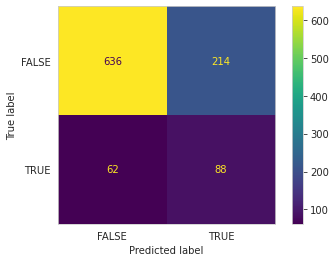

In [55]:
# Plot the confusion matrix again with selected features decision tree
# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [56]:
cf = confusion_matrix(y_test, y_pred)
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

[[636 214]
 [ 62  88]]
TP:  88 , FP:  214 , TN:  636 , FN: 62


In [57]:
## Naive-Bayes Modeling for all features - baseline Naive-Bayes model
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_resampled, y_resampled)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


In [58]:
 # Predicted values
 y_pred

array(['FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE',
       'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE',
       'FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE',
       'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE',
       'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE',
       'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE',
       'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE',
       'FALSE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE',
       'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE',
       'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE',
       'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TR

In [59]:
# Actual values
y_test

471     FALSE
143      TRUE
1757    FALSE
1194    FALSE
208     FALSE
        ...  
2872    FALSE
3061    FALSE
2125    FALSE
2179    FALSE
1526    FALSE
Name: Churn, Length: 1000, dtype: object

In [60]:
# Understand the Naive Bayes baseline model
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  73
Classes  ['FALSE' 'TRUE']
Number of records for classes  [2000. 2000.]
Log prior probability for classes  [-0.69314718 -0.69314718]
Log conditional probability for each feature given a class
 [[ -2.34989973  -4.80986187  -1.80148269  -2.36358096  -3.57340585
   -1.67506339  -2.36690534  -4.14012644  -1.66981294  -2.36524177
   -4.77084759  -4.64665445  -5.46069472  -5.95565869  -6.58485462
  -11.07349099 -10.61875483 -11.07349099 -10.85642648 -11.57426628
  -10.93241239 -10.80879844 -11.04363803 -11.13601135 -10.83232893
  -11.20270272 -11.04363803 -11.16880117 -10.61875483 -10.85642648
  -10.74135715 -10.80879844 -11.07349099 -11.07349099 -10.98647961
  -10.9064369  -10.78580892 -10.93241239 -10.76333606 -10.85642648
  -11.04363803 -10.8811191  -10.9064369  -10.83232893 -10.76333606
  -10.95908064 -10.95908064 -10.78580892 -10.85642648 -10.59970664
  -10.63817292 -10.85642648 -10.61875483 -11.23779404 -10.85642648
  -11.39194472 -10.83232893 -11.13601135 -1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       FALSE       0.89      0.57      0.70       850
        TRUE       0.20      0.61      0.30       150

    accuracy                           0.58      1000
   macro avg       0.55      0.59      0.50      1000
weighted avg       0.79      0.58      0.64      1000



In [62]:
from sklearn.metrics import accuracy_score

print('The Baseline Naive Bayes Model accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The Baseline Naive Bayes Model accuracy score is: 0.5790


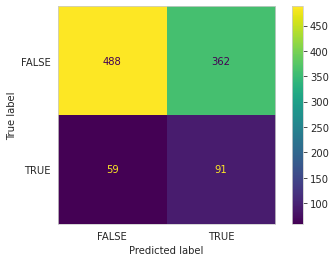

In [63]:
# Plot the confusion matrix again with baseline NB model
# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[488 362]
 [ 59  91]]
TP:  91 , FP:  362 , TN:  488 , FN: 59


In [65]:
## Retrain the Naive-Bayes model for selected features only in the same training dataset, then use the only selected features in the test dataset also
# We use the similar X_resampled_new, X_test_new split dataset inherited from the decision tree model
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb_selected_features = MultinomialNB()

#Train the model using the training sets
nb_selected_features.fit(X_resampled_new, y_resampled)

#Predict the response for test dataset
y_pred = nb_selected_features.predict(X_test_new)
print ("Succesfully done..")

Succesfully done..


In [66]:
# Understand the Naive Bayes model with selected features
print("Number of features used ",nb_selected_features.n_features_)
print("Classes ",nb_selected_features.classes_)
print("Number of records for classes ",nb_selected_features.class_count_)
print("Log prior probability for classes ", nb_selected_features.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb_selected_features.feature_log_prob_)

Number of features used  65
Classes  ['FALSE' 'TRUE']
Number of records for classes  [2000. 2000.]
Log prior probability for classes  [-0.69314718 -0.69314718]
Log conditional probability for each feature given a class
 [[ -1.42034262  -7.42984136  -6.72769862  -7.42583334  -6.1083533
   -8.73516666  -5.65529751  -3.88030476 -10.14393388  -9.68919772
  -10.14393388  -9.92686937 -10.64470916 -10.00285528  -9.87924132
  -10.11408091 -10.20645423  -9.90277182 -10.27314561 -10.11408091
  -10.23924406  -9.68919772  -9.92686937  -9.81180004  -9.87924132
  -10.14393388 -10.14393388 -10.0569225   -9.97687979  -9.8562518
  -10.00285528  -9.83377895  -9.92686937 -10.11408091  -9.95156198
   -9.97687979  -9.90277182  -9.83377895 -10.02952353 -10.02952353
   -9.8562518   -9.92686937  -9.67014953  -9.70861581  -9.92686937
   -9.68919772 -10.30823693  -9.92686937 -10.46238761  -9.90277182
  -10.20645423 -10.08509338  -9.81180004  -9.70861581  -9.79029384
  -10.0569225   -9.76924043  -9.46605417  -9.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
from sklearn.metrics import accuracy_score

print('The Naive Bayes Model with selected features accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The Naive Bayes Model with selected features accuracy score is: 0.3870


In [68]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       FALSE       0.91      0.31      0.46       850
        TRUE       0.18      0.83      0.29       150

    accuracy                           0.39      1000
   macro avg       0.54      0.57      0.38      1000
weighted avg       0.80      0.39      0.44      1000



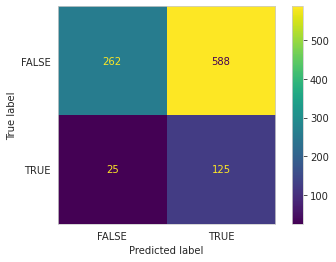

In [69]:
# Plot the confusion matrix again with NB model with selected features
# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()